## Look at the big picture 

In [78]:
## business analysis 

## Get the data

In [1]:
import os 
import tarfile 
import urllib 

In [2]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + '/housing.tgz'

In [3]:
def fetch_housing_data(path=HOUSING_PATH, url=HOUSING_URL):
## if not os.path.isdir(path):
    ## os.mkdir(path)
    os.makedirs(path, exist_ok=True)
    tag_path = os.path.join(path, 'housing.tgz')
    urllib.request.urlretrieve(url, tag_path)
    housing_tgz = tarfile.open(tag_path)
    housing_tgz.extractall(path=path)
    housing_tgz.close()
fetch_housing_data()

In [4]:
import pandas as pd 
def load_housing_data(path=HOUSING_PATH):
    csv_path = os.path.join(path, 'housing.csv')
    return pd.read_csv(csv_path)
housing = load_housing_data()

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

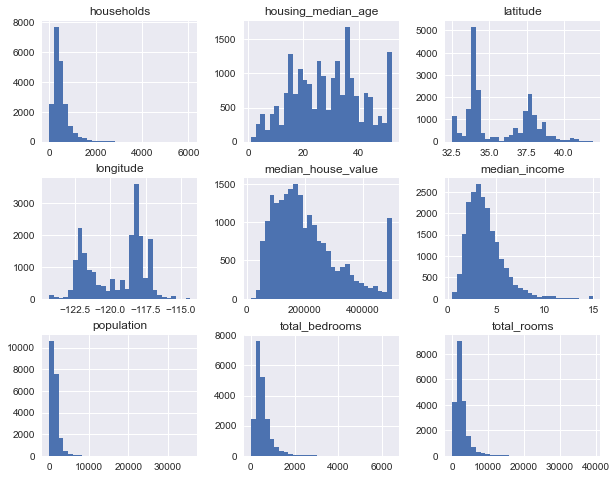

In [10]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
## set the default style 

housing.hist(bins=30, figsize=(10, 8))
plt.show()

In [13]:
import numpy as np
housing['income_cat'] = pd.cut(housing['median_income'], 
                               bins=[0, 1.5, 3, 4.5, 6, np.inf ], labels=[1, 2, 3, 4, 5])
## put into the bin 

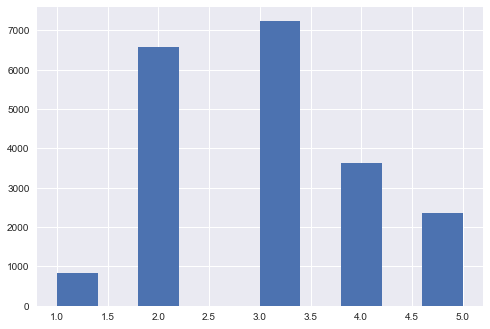

In [14]:
housing['income_cat'].hist()
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
for train_index, test_index in StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42).split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
## np.random.permutation(len(data)): shuffle
## train_test_split: ShuffleSplit().split()

## cross-validator: StratifiedShuffleSplit().split() 
## n_splits: object of n_splits resultes 

In [17]:
sampling_bias = pd.DataFrame()
sampling_bias['overall'] = housing['income_cat'].value_counts()/len(housing)
sampling_bias['strat'] = strat_train_set['income_cat'].value_counts()/len(strat_train_set)
sampling_bias['rand'] = train_set['income_cat'].value_counts()/len(train_set)
sampling_bias['strat_bias'] = (sampling_bias['strat'] - sampling_bias['overall']) / sampling_bias['overall'] 
sampling_bias['rand_bias'] = (sampling_bias['rand'] - sampling_bias['overall']) / sampling_bias['rand'] 
sampling_bias

,overall,strat,rand,strat_bias,rand_bias
3,0.350581,0.350594,0.348595,0.000035,-0.005698
2,0.318847,0.318859,0.317466,0.000038,-0.004349
4,0.176308,0.176296,0.178537,-0.000069,0.012483
5,0.114438,0.114462,0.115673,0.000212,0.010681
1,0.039826,0.039789,0.039729,-0.000912,-0.002439


In [18]:
for data_set in (strat_train_set, strat_test_set):
    data_set.drop('income_cat', axis=1, inplace=True)
    
## 'income_cat', axis=1: columns='income_cat'
## inplace: If False, return a copy. True do operation inplace and return None.

## Discover and visualize the data to gain insights 

In [19]:
housing = strat_train_set.copy()
## df.copy() not change the original data 

In [20]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


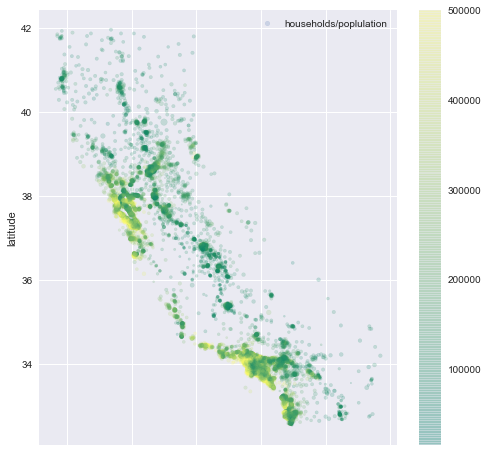

In [21]:
housing.plot(kind='scatter', x = 'longitude', y = 'latitude',
            s=housing['households']/housing['population']*30, label='households/poplulation',
            c=housing['median_house_value'], colorbar='True', cmap=plt.get_cmap('summer'),
            figsize=(8, 8), alpha=0.2)
plt.show()

In [22]:
corr_matrix = housing.corr().median_house_value.sort_values(ascending=False)
corr_matrix

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

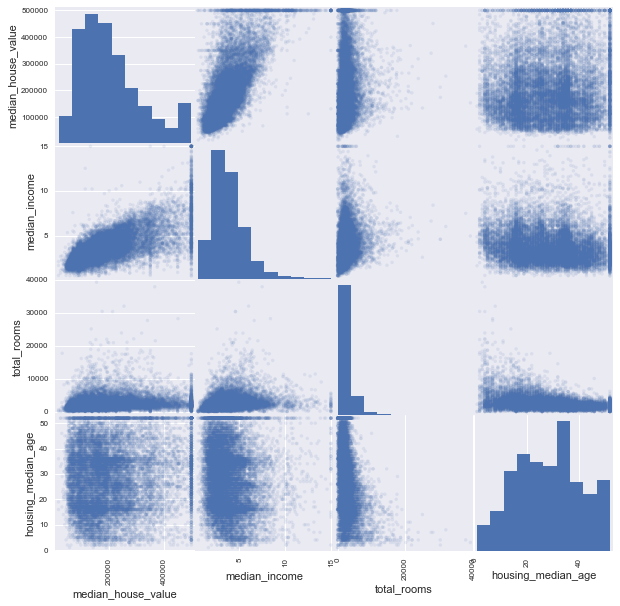

In [23]:
from pandas.plotting import scatter_matrix
corr_attributes = list(corr_matrix.index[:4])
scatter_matrix(housing[corr_attributes], figsize=(10, 10),alpha=0.1)
plt.show()

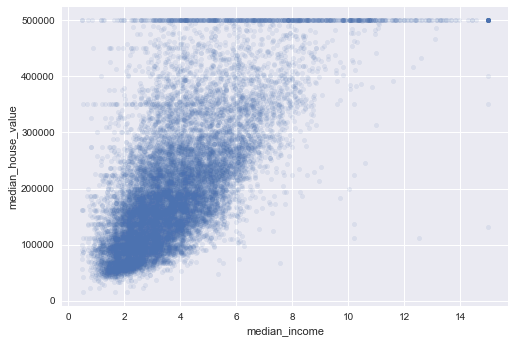

In [24]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.show()

In [25]:
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_household'] = housing['total_bedrooms'] / housing['households']

In [26]:
housing.corr().median_house_value.sort_values(ascending=False)

median_house_value        1.000000
median_income             0.687151
rooms_per_household       0.146255
total_rooms               0.135140
housing_median_age        0.114146
households                0.064590
total_bedrooms            0.047781
population               -0.026882
bedrooms_per_household   -0.043349
longitude                -0.047466
latitude                 -0.142673
bedrooms_per_room        -0.259952
Name: median_house_value, dtype: float64

In [27]:
housing_labels = strat_train_set['median_house_value'].copy()
housing = strat_train_set.drop('median_house_value', axis=1)

## Prepare the data

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_num_df = pd.DataFrame(X, index=housing_num.index, columns=housing_num.columns)
## estimator: can estimate/analyze 
## transformaers, predictor: some estimator can tranform, predict 

In [29]:
imputer.strategy, imputer.statistics_
##learned parameters, hyperparameters 

('median',
 array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
        1164.     ,  408.     ,    3.54155]))

In [30]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
housing_cat = onehot_encoder.fit_transform(housing[['ocean_proximity']])
housing_cat
## housing[['ocean_proximity']]: return DataFrame
## housing['ocean_proximity']: return Series

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [31]:
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [32]:
## duck typing: if it looks like a duck, sounds like a duck, it is a duck 
## base class: TransformerMixin()
## BaseEstimator(): get_params() and set_params()
from sklearn.base import BaseEstimator, TransformerMixin

In [33]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [35]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 
class CombineAttributesAdder(BaseEstimator, TransformerMixin):
    ## no need to inherite from BaseEstimator or TransformerMixin here 
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    def fit(self, X, y=None):
        return self
    ## nothing else to do 
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, 
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
## np.c_ : concatenate

In [36]:
attributes_adder = CombineAttributesAdder(add_bedrooms_per_room=False)
housing_add_attributes = attributes_adder.transform(housing.values)
housing_add_attributes.shape

(16512, 11)

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
test = housing[['median_income']].copy()
stan_scalar = StandardScaler()
stan_test = stan_scalar.fit_transform(test)
minmax_scalar = MinMaxScaler()
minmax_test = minmax_scalar.fit_transform(test)
test['stan_test'] = stan_test
test['minmax_test'] = minmax_test 
test.describe()

,median_income,stan_test,minmax_test
count,16512.000000,1.651200e+04,16512.000000
mean,3.875884,9.940705e-17,0.232823
std,1.904931,1.000030e+00,0.131373
min,0.499900,-1.772289e+00,0.000000
25%,2.566950,-6.871505e-01,0.142553
50%,3.541550,-1.755153e-01,0.209766
75%,4.745325,4.564298e-01,0.292784
max,15.000100,5.839873e+00,1.000000


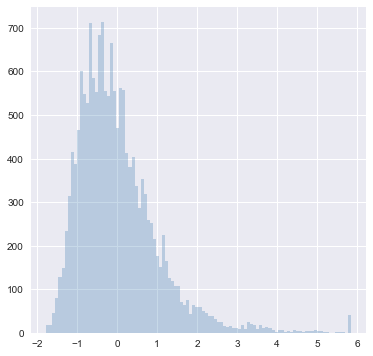

In [38]:
fig = plt.figure(figsize=(6, 6))
plt.hist(stan_test, bins=100, alpha=0.3, color='steelblue')
plt.show()

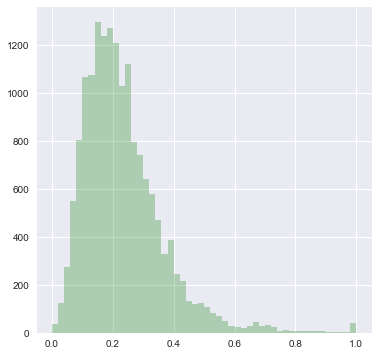

In [39]:
fig = plt.figure(figsize=(6, 6))
plt.hist(minmax_test, bins=50, alpha=0.3, color='forestgreen')
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [41]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ## 'onehot_encoder'
    ('attributes_adder', CombineAttributesAdder()),
    ('stan_scalar', StandardScaler())
])
housing_num_prepared=num_pipeline.fit_transform(housing_num)

In [42]:
from sklearn.compose import ColumnTransformer
num_attributes = list(housing_num)
cat_attributes = ['ocean_proximity']
full_pipeline=ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', OneHotEncoder(), cat_attributes)
])
housing_prepared = full_pipeline.fit_transform(housing)
attributes = list(housing)
housing_prepared_df = pd.DataFrame(housing_prepared, index=housing.index,)
housing_prepared_df.head()
## OneHotEncoder(): columns will not fit 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,0.006223,-0.121122,0.0,1.0,0.0,0.0,0.0
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.569256,-0.040811,-0.810867,0.0,0.0,0.0,0.0,1.0
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.018024,-0.075371,-0.338273,0.0,1.0,0.0,0.0,0.0
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.595140,-0.106803,0.961205,0.0,0.0,0.0,0.0,1.0
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.251241,0.006109,-0.474513,1.0,0.0,0.0,0.0,0.0


In [43]:
## list(housing_num): list, (8)
## housing_num.columns: index, (8, )

In [44]:
columns=[attributes + list(i) for i in onehot_encoder.categories_]
len(columns[0])

14

## Select and Train a model 

In [45]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(housing_prepared, housing_labels)

LinearRegression()

In [46]:
some_data = housing.iloc[:10]
some_labels = housing_labels.iloc[:10]
some_data_prepared = full_pipeline.transform(some_data)
linear_predictions = linear_model.predict(some_data_prepared)
print(list(some_labels), '\n',  linear_predictions)
## loc: until id 10  iloc[:10]

[72100.0, 279600.0, 82700.0, 112500.0, 238300.0, 165700.0, 412300.0, 349600.0, 181300.0, 500001.0] 
 [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089 206382.40770567 376422.05961781 266569.80764938
 151001.79721225  30119.48436056]


In [47]:
from sklearn.metrics import mean_squared_error
linear_mse = mean_squared_error(some_labels, linear_predictions)
linear_rmse = np.sqrt(linear_mse)
linear_rmse
## underfit model 

155776.4037196849

In [48]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(housing_prepared, housing_labels)
tree_predictions = tree_model.predict(some_data_prepared)

In [49]:
tree_mse = mean_squared_error(some_labels, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
## overfit model 

0.0

In [50]:
def display_errors(errors):
    print('errors', errors)
    print('errors.mean()', errors.mean())
    print('errors.std()', errors.std())

In [51]:
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(tree_model, housing_prepared, housing_labels,
                          scoring = 'neg_mean_squared_error', cv=10)
tree_rmses = np.sqrt(-tree_scores)
display_errors(tree_rmses)
## sklearn.model_selectionf for model_selection process
## use cross validation to replace train_test_split 
##  scoring = 'neg_mean_squred_error', cv=10

errors [70958.87885113 72061.48691169 66706.14666999 70969.13337919
 69103.94669084 76942.63073487 70994.71293251 73383.20493468
 68481.73860787 72012.09253666]
errors.mean() 71161.39722494257
errors.std() 2669.487358953202


In [52]:
linear_scores = cross_val_score(linear_model, housing_prepared, housing_labels, 
                               scoring = 'neg_mean_squared_error', cv=10)
linear_rmses = np.sqrt(-linear_scores)
display_errors(linear_rmses)

errors [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
errors.mean() 69104.07998247063
errors.std() 2880.3282098180716


In [53]:
def get_rmse_and_errors(model, housing_prepared=housing_prepared, housing_labels=housing_labels):
    model.fit(housing_prepared, housing_labels)
    houisng_predictions = model.predict(housing_prepared)
    mse = mean_squared_error(housing_labels, housing_labels)
    rmse = np.sqrt(mse)
    print('rmse', rmse)
    
    scores = cross_val_score(model, housing_prepared, housing_labels,
                            scoring = 'neg_mean_squared_error', cv=10)
    errors = np.sqrt(-scores)
    display_errors(errors)

In [54]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(random_state=42)
get_rmse_and_errors(forest_model)

rmse 0.0
errors [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
errors.mean() 50435.58092066179
errors.std() 2203.3381412764606


## Fine tune your model 

In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 4]},
]
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, 
                           cv=5,scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
## whether bootstrap sample is used, bootstrap = False: the whole dataset is used 
## cross_val_predict, cross_val_score
## return_train_score=True

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [56]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [57]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [58]:
grid_search.cv_results_

{'mean_fit_time': array([0.07638273, 0.23459229, 0.73784947, 0.1452467 , 0.46163235,
        1.46913085, 0.25125012, 0.69679947, 2.25072794, 0.21211662,
        0.65126739, 2.00085468, 0.11277547, 0.35884061, 0.1840487 ,
        0.57419157]),
 'std_fit_time': array([0.0087036 , 0.01151945, 0.13069693, 0.06398696, 0.0946565 ,
        0.45666598, 0.0196934 , 0.08690139, 0.6113252 , 0.01050144,
        0.02216446, 0.07940006, 0.00412073, 0.00816743, 0.00238413,
        0.01314327]),
 'mean_score_time': array([0.00418949, 0.01134777, 0.03002739, 0.00584021, 0.01282802,
        0.04358344, 0.0070559 , 0.01414819, 0.04160347, 0.00566659,
        0.0108201 , 0.03236771, 0.00547762, 0.01331892, 0.00484614,
        0.01179957]),
 'std_score_time': array([0.00069581, 0.00144822, 0.00349587, 0.00363316, 0.00180922,
        0.0209056 , 0.00281577, 0.00260628, 0.00410655, 0.00113481,
        0.00054135, 0.00276623, 0.00077465, 0.00201307, 0.00067328,
        0.0009382 ]),
 'param_max_features': mas

In [59]:
## GridSearchCV for preprocessing 
## randomized search 
## ensemble methods 

In [60]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [61]:
extra_attributes = ['rooms_per_house', 'pop_per_houses', 'bedroom_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attributes = list(cat_encoder.categories_[0])
attributes = num_attributes + cat_one_hot_attributes + extra_attributes
sorted(zip(feature_importances, attributes), reverse=True)
## named_transformers_
## categories_[0]: list 

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'NEAR OCEAN'),
 (0.10703132208204354, 'INLAND'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, '<1H OCEAN'),
 (0.048203121338269206, 'ISLAND'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887776, 'households'),
 (0.006792660074259966, 'NEAR BAY'),
 (0.0030281610628962747, 'bedroom_per_room'),
 (0.0015247327555504937, 'pop_per_houses'),
 (7.834806602687504e-05, 'rooms_per_house')]

In [62]:
final_model = grid_search.best_estimator_
test_X = strat_test_set.drop('median_house_value', axis=1).copy()
test_y = strat_test_set['median_house_value']
test_X_prepared = full_pipeline.transform(test_X)
test_pred = final_model.predict(test_X_prepared)
test_mse = mean_squared_error(test_y , test_pred)
test_rmse = np.sqrt(test_mse)
test_rmse

47873.26095812988

In [63]:
from scipy import stats 
confidence = 0.95 
squared_errors = (test_pred - test_y)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, 
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)
))
## 95% intervall for generalization error 
## stats.sem() standard error for the mean 

array([45893.36082829, 49774.46796717])

## Exercises

### How does the best SVR predictor perform?

In [64]:
from sklearn.svm import SVR
svr = SVR()
## support vector regressionn 
## grid_search: exhuast opetions
## random_research: hyperparameter distributions 

In [65]:
grid_params = [{'kernel': ['linear', 'rbf', 'sigmoid']}]
grid_search = GridSearchCV(svr, grid_params,
                          scoring='neg_mean_squared_error', cv=5, return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'kernel': ['linear', 'rbf', 'sigmoid']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [66]:
grid_search.best_estimator_

SVR(kernel='linear')

### GridSearchCV vs RandomizedSearchCV 

In [67]:
##  svr kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'\
## stats.uniform() create a distribution but np.random.uniforom draw a sample 

In [68]:
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import uniform

In [69]:
svr = SVR()
distributions = {'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':uniform(loc=0, scale=5)}
random_search = RandomizedSearchCV (svr,distributions, n_iter=5 )
search = random_search.fit(housing_prepared, housing_labels)

In [70]:
random_search.best_params_

{'C': 10, 'epsilon': 3.859199819192931, 'gamma': 0.0001}

In [71]:
search.best_params_

{'C': 10, 'epsilon': 3.859199819192931, 'gamma': 0.0001}

In [72]:
#### adding a transformer in the preparation pipelint to select most important features 
#### create a full pipeline to do data preparation and final prediction 
#### explore preparation options by GridSearchCV 